In [1]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import re
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

In [2]:
path_1 = r"C:\Users\Samsung\jupyter\Project_Medical_Legal\data"

fn_dic = {}
os.chdir(path_1)
tq = tqdm(os.listdir())
for path_ in tq:
    print(path_)
    path_2 = path_1 + "\\" + path_ + "\\splits"
    os.chdir(path_2)
    fn_list = []
    for i in os.listdir():
        if i.endswith(".txt"):
            fn_ = i.replace(".txt","")
            fn_list.append(fn_)
            #print(fn_)
            f = open(path_2+"\\"+i, 'rt',encoding="utf-8")
            globals ()["{}".format(fn_)] = ""
            while True:
                line = f.readline()
                if not line: break
                globals ()["{}".format(fn_)] = globals ()["{}".format(fn_)] + line
                #print(line)
            f.close()
    fn_dic[path_] = fn_list
    os.chdir(path_1)

  0%|          | 0/8 [00:00<?, ?it/s]

20220902
20220907
20220919
20220919_2
20220923
20221018
20221026
20221030


In [3]:
data_dic = {}
for key_,value_ in fn_dic.items():
    data_dic[key_] = [len(value_)]

df_ = pd.DataFrame.from_dict(data_dic).T
df_

,0
20220902,360
20220907,291
20220919,10020
20220919_2,9156
20220923,4939
20221018,175
20221026,189
20221030,127


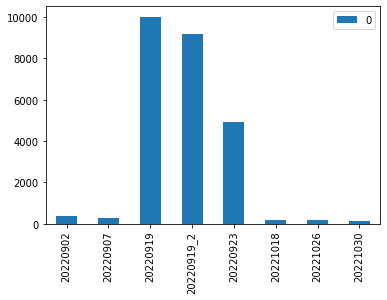

In [4]:
df_.plot.bar()

In [28]:
a_b = [1,2,3,4]
a_b[-2:]

[3, 4]

# Sentence split

## 1. find ending patterns with "."

In [39]:
target_word = "면."
def find_patterns(target_word):
    en_dic = {}
    en_dic2 = {}

    for key_,value_ in fn_dic.items():
        en_all = []
        en_all2 = []
        fn_list = value_
        for fn_ in fn_list:
            fn_s = globals ()["{}".format(fn_)].splitlines()
            en_s = [i[-2:] for i in fn_s if i[-1:]=="."]
            en_s2 = [i[-5:] for i in fn_s if i[-2:]==target_word]
            #print(en_s)
            en_all.extend(en_s)
            en_all2.extend(en_s2)
        en_dic[key_] = Counter(en_all).most_common(5)
        en_dic2[key_] = en_all2
    return en_dic,en_dic2
        #mean_nonezero = np.mean([x for x in page_data if x >0])

In [41]:
find_patterns("AAAAA")[0]

{'20220902': [('다.', 2509), (').', 520), ('1.', 15), ('7.', 14), ('3.', 12)],
 '20220907': [('다.', 1664), (').', 195), ('면.', 68), (' .', 57), ('음.', 55)],
 '20220919': [('다.', 47117),
  (').', 17051),
  ('조.', 1589),
  ('면.', 1582),
  ('\U000f0855.', 1459)],
 '20220919_2': [('다.', 41641),
  (').', 16416),
  ('조.', 1491),
  ('\U000f0855.', 1459),
  ('면.', 1343)],
 '20220923': [('다.', 29677),
  (').', 6690),
  ('면.', 1143),
  (' .', 795),
  ('조.', 680)],
 '20221018': [('다.', 1878), (').', 62), ('t.', 13), ('m.', 11), ('a.', 8)],
 '20221026': [('다.', 1815), (').', 65), ('..', 33), ('자.', 30), ('까.', 18)],
 '20221030': [('다.', 1781), (').', 100), ('자.', 62), ('..', 24), ('것.', 23)]}

In [43]:
find_patterns("면.")[1]

{'20220902': [],
 '20220907': [', 5면.',
  ' 18면.',
  '6~7면.',
  '6~7면.',
  ' 19면.',
  ' 20면.',
  ' 22면.',
  ' 23면.',
  ' 24면.',
  ' 24면.',
  '254면.',
  '294면.',
  '254면.',
  '296면.',
  '296면.',
  '255면.',
  '298면.',
  '299면.',
  '258면.',
  '303면.',
  '262면.',
  '262면.',
  '304면.',
  '264면.',
  '~37면.',
  ' 39면.',
  ' 41면.',
  ' 41면.',
  ' 49면.',
  '117면.',
  '118면.',
  ' 44면.',
  '~46면.',
  ' 50면.',
  ' 17면.',
  '~42면.',
  ' 39면.',
  ' 47면.',
  '~43면.',
  '100면.',
  '~46면.',
  ' 50면.',
  ' 17면.',
  '444면.',
  '444면.',
  ' 50면.',
  ' 17면.',
  ' 50면.',
  '444면.',
  ' 15면.',
  '제58면.',
  ' 69면.',
  '101면.',
  '128면.',
  ', 6면.',
  ' 10면.',
  ' 11면.',
  ' 11면.',
  ' 12면.',
  ' 13면.',
  '125면.',
  '~15면.',
  ' 66면.',
  ' 14면.',
  ' 63면.',
  ' 63면.',
  ' 21면.',
  '146면.'],
 '20220919': [' 17면.',
  ' 19면.',
  '357면.',
  ' 22면.',
  '298면.',
  ' 19면.',
  ' 58면.',
  ' 66면.',
  '206면.',
  '500면.',
  '315면.',
  '565면.',
  '407면.',
  ' 24면.',
  ' 73면.',
  '면.',
  '141면.',
  '463면.',
  '428면.',
  '1

In [48]:
find_patterns("자.")[1]

{'20220902': [],
 '20220907': [],
 '20220919': ['살펴보자.',
  '록 하자.',
  '록 하자.',
  '해 보자.',
  '로 하자.',
  '살펴보자.',
  ' 실종자.',
  ' 부재자.',
  '해 보자.',
  '해 보자.',
  '보자.',
  '설명하자.',
  '을 보자.',
  '살펴보자.',
  '어 가자.',
  '로 하자.',
  '로 보자.',
  '해 보자.',
  '살펴보자.',
  '고 가자.',
  ' 해보자.',
  '말해보자.',
  '비해보자.',
  '드려두자.',
  '급해두자.',
  '설명하자.',
  ' 봐보자.',
  '넘어가자.',
  '로 보자.',
  '해 보자.',
  '각해보자.',
  '작 하자.',
  ' 봐보자.',
  '검토하자.',
  '설명하자.',
  '게 보자.',
  '각해보자.',
  ' 봐보자.',
  '해 보자.',
  '살펴보자.',
  '말해두자.',
  ' 봐보자.',
  '명 하자.',
  '려 두자.',
  '해 두자.',
  '바꿔보자.',
  '시작하자.',
  '해 보자.',
  '해 보자.',
  '살펴보자.',
  '해 보자.',
  '해 두자.',
  '살펴보자.',
  '검토하자.',
  '해 보자.',
  '고 가자.',
  '로 보자.',
  ' 봐두자.',
  '살펴보자.',
  '살펴보자.',
  '살펴보자.',
  '살펴보자.',
  '각해보자.',
  '알아보자.',
  '살펴보자.',
  '살펴보자.',
  '나아가자.',
  '해 두자.',
  '해 두자.',
  '해 보자.',
  '해 보자.',
  '해 보자.',
  '해 보자.',
  '고 가자.',
  '로 하자.',
  '각해보자.',
  '살펴보자.',
  ' 봐보자.',
  '살펴보자.',
  '해 보자.',
  '살펴보자.',
  '살펴보자.',
  '록 하자.',
  '고 가자.',
  ' 해보자.',
  '해 놓자.',
  ' 해두자.',

In [50]:
find_patterns("음.")[1]

{'20220902': [],
 '20220907': ['수 없음.',
  '수 없음.',
  '수 없음.',
  '수 없음.',
  '지 않음.',
  '이 없음.',
  '수 없음.',
  '수 없음.',
  '고 있음.',
  '수 없음.',
  '에 있음.',
  '가 있음.',
  '는 없음.',
  '도 있음.',
  '지 않음.',
  '는 없음.',
  '수 없음.',
  '가 있음.',
  '수 없음.',
  '는 없음.',
  '이 있음.',
  '수 없음.',
  '는 없음.',
  '가 있음.',
  '가 있음.',
  '데 있음.',
  '수 없음.',
  '수 있음.',
  '가 있음.',
  '수 없음.',
  '수 없음.',
  '수 없음.',
  '는 없음.',
  '수 없음.',
  '지 않음.',
  '수 없음.',
  '수 없음.',
  '수 없음.',
  '수 있음.',
  '는 없음.',
  '수 있음.',
  '고 있음.',
  '는 없음.',
  '수 없음.',
  '도 않음.',
  '고 있음.',
  '수 없음.',
  '지 않음.',
  '져 있음.',
  '수 없음.',
  '는 없음.',
  '이 없음.',
  '이 있음.',
  '수 있음.',
  '수 없음.'],
 '20220919': ['어 있음.',
  '어 있음.',
  '가되었음.',
  '췌하였음.',
  '성하였음.',
  '이 있음.',
  '수 없음.',
  '수 없음.',
  '수 없음.',
  '없음.',
  '수 있음.',
  '수 없음.',
  '지 않음.',
  '수 없음.',
  '고 있음.',
  '수 있음.',
  '수 없음.',
  '지 않음.',
  '가 없음.',
  '지 않음.',
  '어 있음.',
  '수 없음.',
  '수 없음.',
  '수 없음.',
  '수 없음.',
  '지 않음.',
  '이 없음.',
  '수 없음.',
  '수 없음.',
  '고 있음.',
  '수 없음.',
  '에 있음.',
  '

In [51]:
find_patterns("조.")[1]

{'20220902': [],
 '20220907': ['등 참조.',
  '결 참조.',
  '등 참조.',
  '등 참조.',
  ') 참조.',
  '조 참조.',
  '등 참조.',
  '결 참조.',
  '신 참조.',
  '분 참조.'],
 '20220919': ['제18조.',
  '제56조.',
  '제49조.',
  '” 참조.',
  '면 참조.',
  '하 참조.',
  '하 참조.',
  ' 제8조.',
  '결 참조.',
  '하 참조.',
  '결 참조.',
  '결 참조.',
  ' 제3조.',
  '하 참조.',
  '참조.',
  '제57조.',
  '참조.',
  '호 참조.',
  '2 참조.',
  '3 참조.',
  '면 참조.',
  '면 참조.',
  '하 참조.',
  ') 참조.',
  '용 참조.',
  '참조.',
  '하 참조.',
  '집 참조.',
  '일 참조.',
  '조 참조.',
  '술 참조.',
  '호 참조.',
  '하 참조.',
  '호 참조.',
  ') 참조.',
  '제24조.',
  '311조.',
  '176조.',
  '090조.',
  '조 참조.',
  ') 참조.',
  ') 참조.',
  '도 참조.',
  '면 참조.',
  '제35조.',
  '하 참조.',
  '결 참조.',
  ') 참조.',
  '하 참조.',
  '하 참조.',
  ') 참조.',
  '하 참조.',
  '하 참조.',
  '하 참조.',
  '하 참조.',
  '하 참조.',
  '제24조.',
  '항 참조.',
  '하 참조.',
  ') 참조.',
  ') 참조.',
  ' 제2조.',
  '제4조.',
  '4 참조.',
  '편 참조.',
  '등 참조.',
  '0 참조.',
  '하 참조.',
  '면 참조.',
  '하 참조.',
  '0 참조.',
  '6 참조.',
  '7 참조.',
  '4 참조.',
  '1 참조.',
  '하 참조.',
  '무 참조.',
  '조 참조.

In [52]:
find_patterns(" .")[1]

{'20220902': [],
 '20220907': [' 인력 .',
  ' 유기 .',
  ' 수립 .',
  ' 사육 .',
  ' 사육 .',
  ' 전시 .',
  ' 혹서 .',
  '물리적 .',
  ' 시합 .',
  ' 신체 .',
  ' 사육 .',
  ' 유실 .',
  ' 판매 .',
  '생명 .',
  ' 택배 .',
  ' ‘개 .',
  '니피그 .',
  '가스법 .',
  '이터 .',
  ' 구조 .',
  '은 시 .',
  '당 시 .',
  ' 미국 .',
  ' 구조 .',
  ' 폭행 .',
  ' 진정 .',
  ' 「초 .',
  ' 도입 .',
  '고양이 .',
  ' 설치 .',
  ' 전시 .',
  ' 소음 .',
  ', 냉 .',
  ' 폐업 .',
  ' 시장 .',
  ' 시장 .',
  '시장 .',
  '양수인 .',
  ' 시장 .',
  ' 군수 .',
  ' 군수 .',
  ' 군수 .',
  ' 군수 .',
  '시 .',
  '보호 .',
  ' 보호 .',
  ' 참고 .',
  '적법 .',
  '호 .',
  ' 치료 .',
  ' 지도 .',
  '고 .',
  ' 설치 .',
  '연재해 .',
  ' 거부 .',
  '법 .',
  ' 신체 .'],
 '20220919': ['2 ) .',
  '9 ) .',
  '509 .',
  '015 .',
  '. . .',
  '. . .',
  ' 없다 .',
  '˙ ˙ .',
  '˙ ˙ .',
  '˙ ˙ .',
  '˙ ˙ .',
  '0 ) .',
  '실증적 .',
  '객관적 .',
  '감정적 .',
  ' 법적 .',
  ' 고의 .',
  '임고의 .',
  '사회적 .',
  '사실적 .',
  '무정형 .',
  ' 예비 .',
  '주관적 .',
  ' 교사 .',
  ' 지휘 .',
  ' 경합 .',
  '시간적 .',
  '회봉사 .',
  '법처분 .',
  ' 인력 .',
  ' 유기 .',
  '

In [53]:
find_patterns("..")[1]

{'20220902': [],
 '20220907': ['요?...'],
 '20220919': ['뿐이다..',
  ' 된다..',
  '쳤군...',
  '충실한..',
  '.16..',
  '것이다..',
  '78면..',
  '.....',
  '요?...',
  '14...'],
 '20220919_2': ['뿐이다..',
  ' 된다..',
  '쳤군...',
  '충실한..',
  '.16..',
  '것이다..',
  '78면..',
  '.....',
  '14...'],
 '20220923': [' 있다..', '4ff..', '14f..', 'ufl..', '서 ...', '은 ...', ' 20..'],
 '20221018': [],
 '20221026': [', 참..',
  '열이라..',
  '그래서..',
  '싼데...',
  '것인데..',
  '시길...',
  '등등..',
  '높으니..',
  '으니까..',
  '해보니..',
  '아이고..',
  '음...',
  ', 참..',
  '하였고..',
  '는지...',
  '니다...',
  '니다...',
  ' 코스..',
  ' 는...',
  ' 등등..',
  ' 기준..',
  '그러나..',
  ' 주인..',
  ' 보니..',
  ' 맞네..',
  '마세요..',
  '리라...',
  '아와서..',
  '잡히고..',
  '하면...',
  ' 오오..',
  '그러나..',
  ' 하하..'],
 '20221030': ['않아서..',
  '이고...',
  '부글..',
  ' 참패..',
  ' 되고..',
  '지니까..',
  '그리고..',
  'ica..',
  '것이다..',
  '나온다..',
  ' 곱똥..',
  '라던가..',
  '하지만..',
  '나면...',
  '리고...',
  'd는...',
  '하여...',
  'ult..',
  ' on..',
  '결과...',
  'ace..',
  ' 내성..',


In [54]:
find_patterns("t.")[1]

{'20220902': [],
 '20220907': ['ment.', 'g it.'],
 '20220919': ['utet.',
  'echt.',
  'ract.',
  'vent.',
  'echt.',
  'vent.',
  'ment.',
  'g it.',
  'ment.',
  'sult.',
  'lant.',
  '& Ht.',
  'sult.',
  'sent.',
  'raft.',
  '. Wt.',
  'fect.',
  '며 Rt.',
  'vant.',
  'list.',
  'list.'],
 '20220919_2': ['ract.',
  'vent.',
  'echt.',
  'vent.',
  'ment.',
  'sult.',
  'lant.',
  '& Ht.',
  'sult.',
  'sent.',
  'raft.',
  '. Wt.',
  'fect.',
  '며 Rt.',
  'vant.',
  'list.',
  'list.'],
 '20220923': ['rest.',
  'ment.',
  '/Rat.',
  '/Rat.',
  '/Rat.',
  'liet.',
  'rost.',
  'tedt.',
  'mott.',
  'mott.',
  'rost.',
  'mott.',
  'Port.',
  'iret.',
  'arkt.',
  '.Abt.',
  'GHSt.'],
 '20221018': ['Vt.',
  'Vt.',
  'Rt.',
  'Lt.',
  'post.',
  'Lt.',
  'post.',
  'post.',
  ' ant.',
  ' ant.',
  ' ant.',
  'post.',
  ' ant.'],
 '20221026': ['test.'],
 '20221030': []}

{'20220902': [],
 '20220907': ['ment.', 'g it.'],
 '20220919': ['utet.',
  'echt.',
  'ract.',
  'vent.',
  'echt.',
  'vent.',
  'ment.',
  'g it.',
  'ment.',
  'sult.',
  'lant.',
  '& Ht.',
  'sult.',
  'sent.',
  'raft.',
  '. Wt.',
  'fect.',
  '며 Rt.',
  'vant.',
  'list.',
  'list.'],
 '20220919_2': ['ract.',
  'vent.',
  'echt.',
  'vent.',
  'ment.',
  'sult.',
  'lant.',
  '& Ht.',
  'sult.',
  'sent.',
  'raft.',
  '. Wt.',
  'fect.',
  '며 Rt.',
  'vant.',
  'list.',
  'list.'],
 '20220923': ['rest.',
  'ment.',
  '/Rat.',
  '/Rat.',
  '/Rat.',
  'liet.',
  'rost.',
  'tedt.',
  'mott.',
  'mott.',
  'rost.',
  'mott.',
  'Port.',
  'iret.',
  'arkt.',
  '.Abt.',
  'GHSt.'],
 '20221018': ['Vt.',
  'Vt.',
  'Rt.',
  'Lt.',
  'post.',
  'Lt.',
  'post.',
  'post.',
  ' ant.',
  ' ant.',
  ' ant.',
  'post.',
  ' ant.'],
 '20221026': ['test.'],
 '20221030': []}

# 2. extract full sentences only

- "다", ")."
- "2칸 이상의공백"은 살린다 

In [13]:
#ver_ = "cha"
#tar_len = 4
#sp_ = or_all
def eliminate_short(version,tar_len,sp_):
    tar_sen = []
    remove_sen = []

    for i in range(len(sp_)):
        if sp_[i] =="  ":
            tar_sen.append(sp_[i])
        else:
            if version =="cha":
                if len(sp_[i]) >= tar_len:
                    tar_sen.append(sp_[i])
                else:
                    try:
                        remove_can = [sp_[i-1],sp_[i],sp_[i+1]]
                        remove_sen.append(remove_can)
                    except:
                        remove_sen.append(sp[i])
            elif version =="word":
                if len(sp_[i].split(" ")) >= tar_len:
                    tar_sen.append(sp_[i])      
                else:
                    remove_sen.append(sp_[i])
    return tar_sen, remove_sen

In [14]:
origin_dic = {}
origin_text = {}

In [15]:

for key_,value_ in fn_dic.items():
    fn_list = value_
    original_all = []
    for fn_ in fn_list:
        fn_s = globals ()["{}".format(fn_)].splitlines()
        # Rule 2: # strip \t, \xa0 관련 제거하기
        origi_ = [i.strip().replace("\t"," ").replace("\xa0","") for i in fn_s ]
        original_all.extend(origi_)
    original_all = re.sub(' {2,}','  ', " ".join(original_all))
    reg = re.compile(" {2,}|.+?다[.]|.*?[)][.]")
    or_ = reg.findall(original_all)
    or_all = []
    for i in or_:
        tar_ = ")."
        if tar_ in i:
            can_ = i.split(tar_)
            can_2 = [i2 +tar_ for i2 in can_[:-1]]
            can_2.append(can_[-1])
            or_all.extend(can_2)
        else:
            or_all.append(i)
    or_all = list(map(lambda x: x.strip() if x != "  " else "  ",or_all))
    
    # Rule 4: "다." 혼자 있으면 나머지랑 합치기
    index_ = []
    for i in range(len(or_all)):
        if or_all[i] == "다.":
            after_ = or_all[i]  + " " + or_all[i+1]
            index_in = i
            index_.append([index_in,after_]) 
    for i in index_:
        ind_ = i[0]
        txt_ = i[1]
        or_all[ind_] = txt_
    for i in index_:
        del_in = i[0]+1
        del or_all[del_in]
    # or_all
    
    # remove_
    remove_ = eliminate_short("cha",3,or_all)[1]
    remove_len = len(remove_)
    
    save_ = eliminate_short("cha",3,or_all)[0]
    
    test_ori = original_all.replace(" ","")
    test_ori = re.sub(' {2,}','  ', " ".join(test_ori))
    result_ = "".join(or_all).replace(" ","")
    result_ = re.sub(' {2,}','  ', " ".join(result_))
    
    rates = (len(result_)/len(test_ori))*100
    
    data_can = [remove_len,remove_,rates,(len(test_ori),len(result_))]
    origin_dic[key_] = data_can
    origin_text[key_] = or_all


In [16]:
origin_dic

{'20220902': [0, [], 99.88995456389814, (1121355, 1120121)],
 '20220907': [0, [], 99.91198454690519, (893025, 892239)],
 '20220919': [9,
  [['이 때 판례는 실손해의 증명으로 법정이율보다 많은 초과손해 도 특별손해(제393조 제2항 )로서 배상받을 수 있다고 본다(대판 1991.10.11, 91다25369 참조. 이 판결은 선례로서의 가치가 있 는 판결이 될 수 없음을 근거로 판례가 긍정설을 취한다고 볼 수 없 다는 견해 가 있다.',
    ').',
    '학설은 부정설과 긍정설이 있다.'],
   ['박영효도 ‘戊子上疏(무자상소)’에서 양반관인 들이 불법무질서의 국가를 만들고 나라를 陷穽(함정)국가, 감옥국가로 전락시키고 있다 한다(朴泳孝(박영효), 上疏文(상소문), \U000f0854근대 한국명논설집\U000f0855(新東亞(신동아) 1996년 1월호 별책부록).',
    ').',
    '서재필도 같은 말을 하면서 행복추구의 의욕을 아주 말살하고 나라를 멸망의 길로 몰고 간다 하였다.'],
   ['특히 국군의 정치적 중립의무를 강조하는 헌법취지 등을 고려하면 군인 개인의 정치적 표현에는 제한이 따를 수밖에 없 다(헌재 2016.2.25. 2013헌바111. 군대 내에서 불온도서소지 등을 금지 하는 군인복무규율은 합헌이다(헌재 2010.10.28. 2008헌마638).',
    ').',
    '3.2.2 병역의무이행으로 인한 불이익처우금지 국민의 진정기본의무인 국방의 의무는 특히 병역의무의 이행에 관련하여서 경찰권과 병역권에 대하여, 경찰권․경찰은 국민의 생명․신체․재산보호, 범죄예방․진압․수사, 치안정보수집, 교통 제1절 권리실체론\u3000163 단속 기타 공공의 안녕과 질서유지를 임무로 하는 국가권력으로서(경찰법 제3조, 경찰관직무집행법) ‘병역권’과 다르나, 병역법상 징집되어 현역병 복무중인 자가 전투경찰순경으로 대간첩작전 

In [18]:
index = np.arange(len(origin_dic))
label = origin_dic.keys()
value = []
for key_,value_ in origin_dic.items():
    value.append(value_[2])


'Average of Retention Rate:'

99.97314872239383

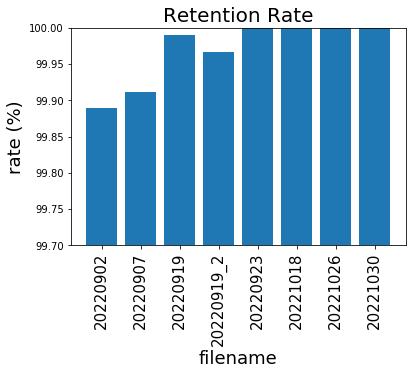

In [20]:
plt.bar(index, value)
plt.title('Retention Rate', fontsize=20)
plt.xlabel('filename', fontsize=18)
plt.ylabel('rate (%)', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.xticks(rotation=90)

display("Average of Retention Rate:",np.mean(value))
max_y_lim = 100
min_y_lim = 99.7
plt.ylim(min_y_lim, max_y_lim)

plt.show()

In [57]:
origin_dic

{'20220902': [0, [], 99.88995456389814, (1121355, 1120121)],
 '20220907': [0, [], 99.91198454690519, (893025, 892239)],
 '20220919': [9,
  [['이 때 판례는 실손해의 증명으로 법정이율보다 많은 초과손해 도 특별손해(제393조 제2항 )로서 배상받을 수 있다고 본다(대판 1991.10.11, 91다25369 참조. 이 판결은 선례로서의 가치가 있 는 판결이 될 수 없음을 근거로 판례가 긍정설을 취한다고 볼 수 없 다는 견해 가 있다.',
    ').',
    '학설은 부정설과 긍정설이 있다.'],
   ['박영효도 ‘戊子上疏(무자상소)’에서 양반관인 들이 불법무질서의 국가를 만들고 나라를 陷穽(함정)국가, 감옥국가로 전락시키고 있다 한다(朴泳孝(박영효), 上疏文(상소문), \U000f0854근대 한국명논설집\U000f0855(新東亞(신동아) 1996년 1월호 별책부록).',
    ').',
    '서재필도 같은 말을 하면서 행복추구의 의욕을 아주 말살하고 나라를 멸망의 길로 몰고 간다 하였다.'],
   ['특히 국군의 정치적 중립의무를 강조하는 헌법취지 등을 고려하면 군인 개인의 정치적 표현에는 제한이 따를 수밖에 없 다(헌재 2016.2.25. 2013헌바111. 군대 내에서 불온도서소지 등을 금지 하는 군인복무규율은 합헌이다(헌재 2010.10.28. 2008헌마638).',
    ').',
    '3.2.2 병역의무이행으로 인한 불이익처우금지 국민의 진정기본의무인 국방의 의무는 특히 병역의무의 이행에 관련하여서 경찰권과 병역권에 대하여, 경찰권․경찰은 국민의 생명․신체․재산보호, 범죄예방․진압․수사, 치안정보수집, 교통 제1절 권리실체론\u3000163 단속 기타 공공의 안녕과 질서유지를 임무로 하는 국가권력으로서(경찰법 제3조, 경찰관직무집행법) ‘병역권’과 다르나, 병역법상 징집되어 현역병 복무중인 자가 전투경찰순경으로 대간첩작전 

In [56]:
origin_text["20220919"]

['[[BODY 1]]  머 리 말 우리는 매일 방송이나 신문에서 금융시장에 대해 보도하는 것을 들으면서 산 다.',
 '‘부동산 버블’이니, 미국 연방준비제도이사회에서 ‘금리’를 올렸다느니, 어느 회사의 주식이 곤두박질했다느니, 미국이 ‘양적완화’를 했다느니 하는 말이 바로 그것들이다.',
 '우리는 현재 돈이 돈을 버는 ‘금융자본주의’ 시대에 살고 있다.',
 '비록 금융자본주의에 대한 비판적 시각이 존재하지만 이것이 전 세계로 전파되고 금 융혁신은 거듭되고 있다는 점은 부인할 수 없다.',
 '그러나 정작 우리들은 금융에 대한 정확한 지식을 가지고 있지 않은 채 주식 에 투자하고, 펀드에 가입하거나 파생상품을 구입하는 등의 계약을 체결하기도 한다.',
 '은행이 무엇을 하는 금융기관인지, 펀드는 무엇인지, 파생상품은 도대체 무 엇이고 어떻게 거래되는지에 대해서 잘 모르면서 말이다.',
 '필자가 강의를 시작하 기 전에 학생들로부터 강의에서의 바람을 묻고 들어보면 그들은 돈 거래를 하면 서 ‘사기’를 당하지 않는 방법을 가르쳐 주었으면 좋겠다는 말들을 한다.',
 '그런 학 생들의 바라는 점을 알게 되면서 우리들이 금융기관과 올바르게 거래하려면 어 떻게 해야 하는지 그 방법과 관련된 법을 가르쳐야 한다는 생각이 앞섰다.',
 '금융은 재테크의 하나로 돈을 굴려 더 큰 돈으로 만들어 주는 과학이 아니다.',
 '오히려 우리들이 살아가면서 어떠한 목표를 설정하고 그러한 목표를 이루는 데 도움을 주는 과학이라고 해야 옳을 것 같다.',
 '그 목표는 개인, 기업, 국가에 따라 다를 수 있다.',
 '금융관계법은 크게 ‘금융거래법’과 ‘금융법’으로 나누어 볼 수 있다.',
 '금융거래 는 예컨대, 고객이 은행에 예금을 예치하거나 은행으로부터 돈을 꾸면서 자기 소 유의 부동산을 담보로 제공하는 것 같이 금융기관과 일반인들이 하는 금융거래 에 관한 법으로서 주로 민법, 기타 금융거래에 관한 특별법이 적용되는 분야이 다.',
 '한편, 이 책에서 다루고자 하는 주제는 